Точніть (Рівень 1): 0.998


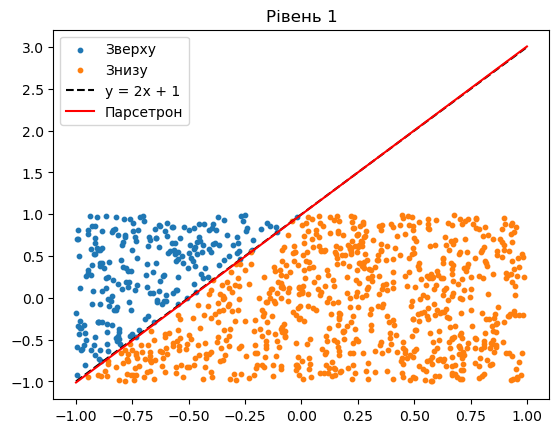

Точність (Рівень 2): 1.0


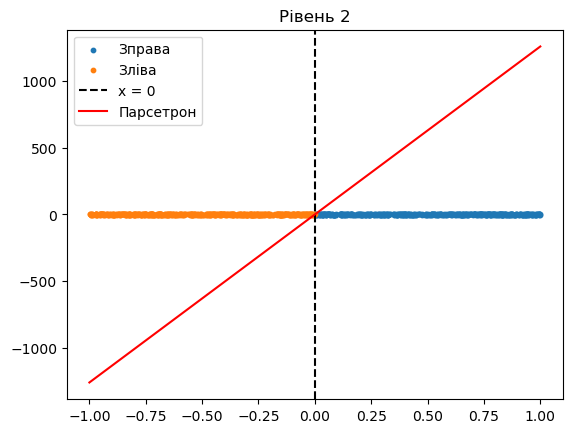

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.w = None

    def fit(self, X, y):
        self.w = np.zeros(3)  

        for _ in range(self.epochs):
            for i in range(len(X)):
                x = np.array([1, X[i][0], X[i][1]])
                if y[i] * np.dot(self.w, x) <= 0:
                    self.w = self.w + self.lr * y[i] * x

    def predict(self, X):
        res = []
        for i in range(len(X)):
            x = np.array([1, X[i][0], X[i][1]])
            res.append(1 if np.dot(self.w, x) >= 0 else -1)
        return np.array(res)


# Рівень 1
def generate_data(n=1000):
    X = np.random.uniform(-1, 1, (n, 2))
    y = []

    for p in X:
        if p[1] > 2 * p[0] + 1:
            y.append(1)
        else:
            y.append(-1)

    return X, np.array(y)


X, y = generate_data()

model = Perceptron()
model.fit(X, y)

pred = model.predict(X)
accuracy1 = (pred == y).sum() / len(y)

print("Точніть (Рівень 1):", accuracy1)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=10, label="Зверху")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], s=10, label="Знизу")

x = np.linspace(-1, 1, 100)
plt.plot(x, 2 * x + 1, 'k--', label="y = 2x + 1")

w0, w1, w2 = model.w
plt.plot(x, -(w0 + w1 * x) / w2, 'r', label="Парсетрон")

plt.legend()
plt.title("Рівень 1")
plt.show()



# Рівень 2
def generate_data_vertical(n=1000):
    X = np.random.uniform(-1, 1, (n, 2))
    y = []

    for p in X:
        if p[0] > 0:
            y.append(1)
        else:
            y.append(-1)

    return X, np.array(y)


Xv, yv = generate_data_vertical()

model2 = Perceptron()
model2.fit(Xv, yv)

pred2 = model2.predict(Xv)
accuracy2 = (pred2 == yv).sum() / len(yv)

print("Точність (Рівень 2):", accuracy2)

plt.scatter(Xv[yv == 1][:, 0], Xv[yv == 1][:, 1], s=10, label="Зправа")
plt.scatter(Xv[yv == -1][:, 0], Xv[yv == -1][:, 1], s=10, label="Зліва")

plt.axvline(0, linestyle="--", color="black", label="x = 0")

w0, w1, w2 = model2.w
x = np.linspace(-1, 1, 100)
plt.plot(x, -(w0 + w1 * x) / w2, 'r', label="Парсетрон")

plt.legend()
plt.title("Рівень 2")
plt.show()
